# 5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection as ms
from sklearn import linear_model
import scipy as sp
%matplotlib inline

In [2]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/house_prices.csv.gz', index_col='Id')
else:
    df = pd.read_csv('./data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
assert df.shape == (1460, 80)

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределение или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регрессии через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

6.509812011089439


((array([-2.55872671, -2.1943508 , -2.00102697, ...,  2.25684237,
          2.31194659,  2.40803025]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (99473.5774663291, 110943.78236502012, 0.8745058959786229))

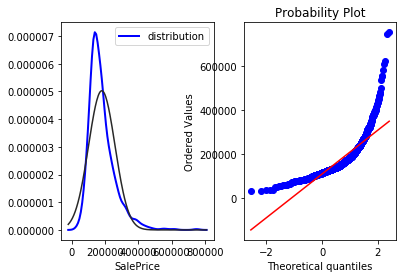

In [6]:
ax = plt.subplot(121)
ax1 = plt.subplot(122)
sns.distplot(df['SalePrice'],hist = False, kde_kws = {"color": "b", "lw": 2, "label": "distribution"},fit = sp.stats.norm, ax = ax)
print(sp.stats.kurtosis(df['SalePrice']))
sp.stats.probplot(df['SalePrice'],dist=sp.stats.loggamma,sparams=(2.5,), plot=ax1)

## 1.1 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

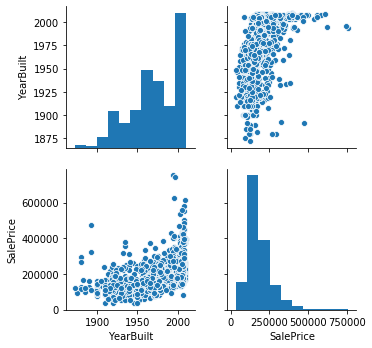

In [7]:
sns.pairplot(df.loc[:,['YearBuilt','SalePrice']]);

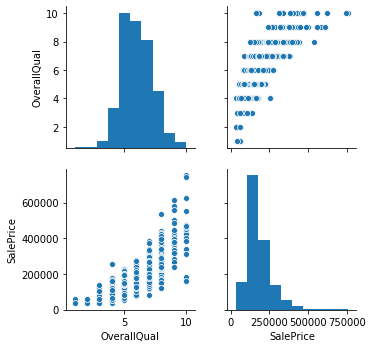

In [8]:
sns.pairplot(df.loc[:,['OverallQual','SalePrice']]);

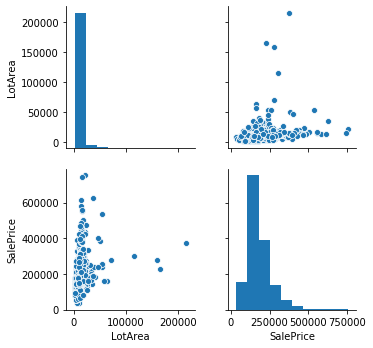

In [9]:
sns.pairplot(df.loc[:,['LotArea','SalePrice']]);

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

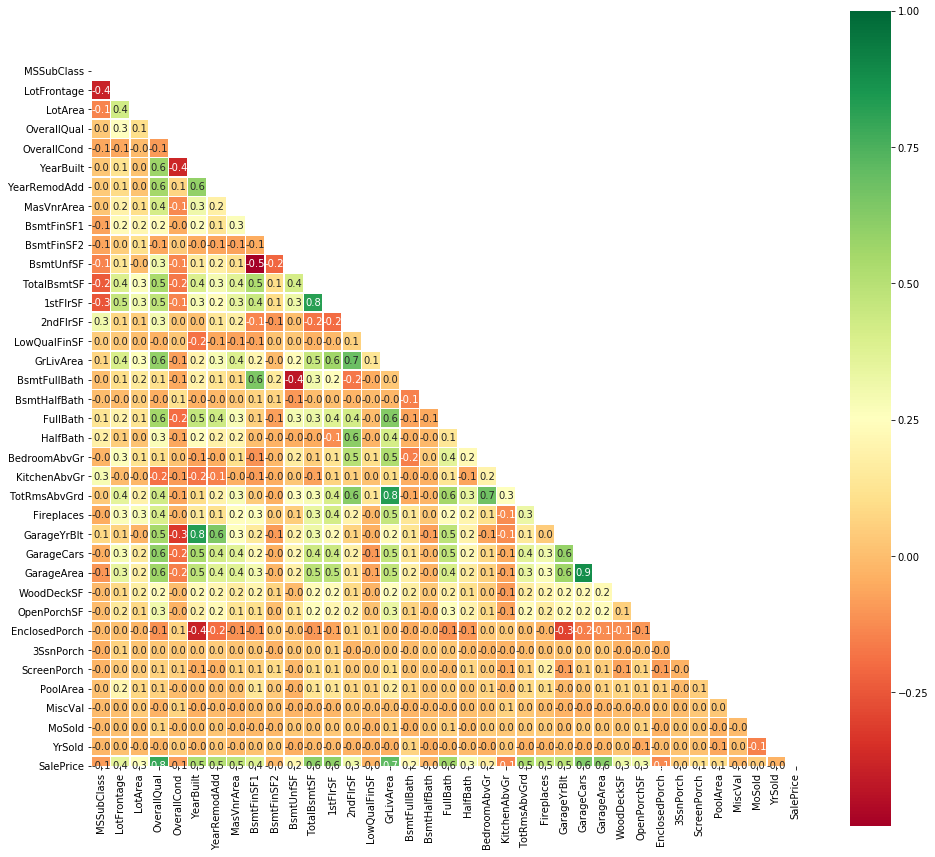

In [10]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 15))
sns.heatmap(corr,cmap='RdYlGn', square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

['OverallQual' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'GarageCars' 'GarageArea'
 'SalePrice']


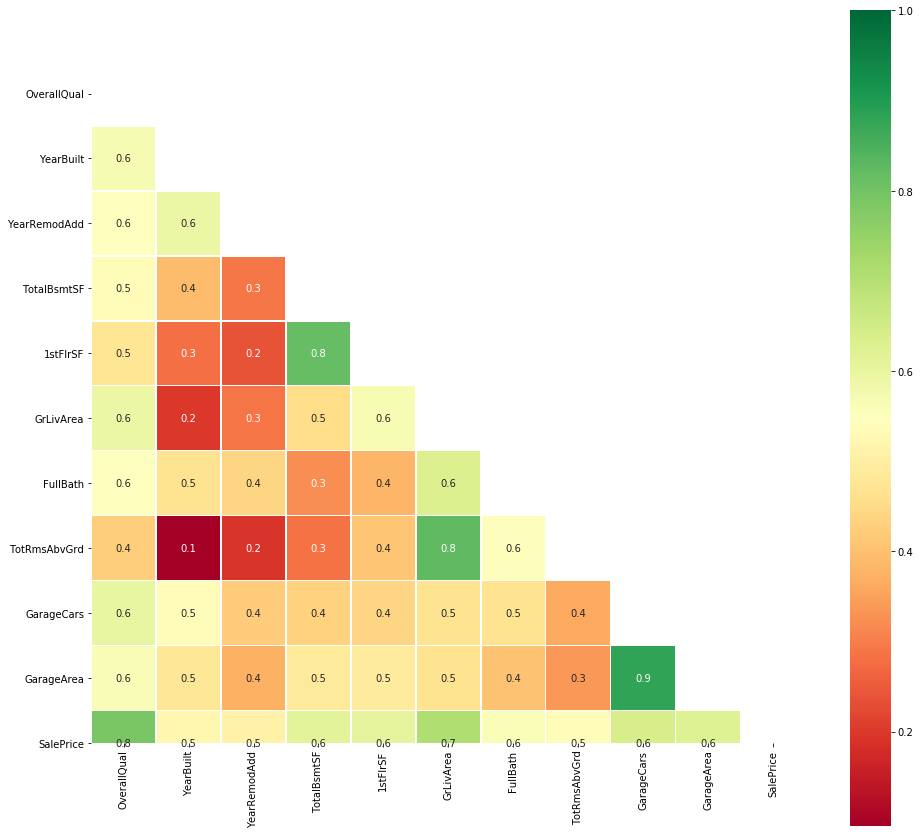

In [11]:
corr = df.corr()
corr_good_columns = np.array(corr.loc[np.abs(corr['SalePrice']) > 0.5].index)
corr_bad_columns = np.array(corr.loc[np.abs(corr['SalePrice']) < 0.5].index)
corr = corr.drop(columns = corr_bad_columns)
corr = corr.drop(index = corr_bad_columns)
print(corr_good_columns)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(16, 15))
sns.heatmap(corr,cmap='RdYlGn', square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больше 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hint: https://stackoverflow.com/a/38134049/3205200

In [12]:
df1 = df

for column in df1.columns:
    number_of_missing = df1[column].isna().sum()
    part_of_missing = number_of_missing/len(df1[column])
    print("for {0}:\n   number of missing - {1};percentage - {2}\n".format(column, number_of_missing, part_of_missing))
    if (part_of_missing > 0.1):
        df1 = df1.drop(columns = column)
    else:
        value = "unknown"
        if(df1[column].dtype != "object"):
            value = df1[column].mean()
        df1[column] = df1[column].fillna(value)
print(df1.head())        

for MSSubClass:
   number of missing - 0;percentage - 0.0

for MSZoning:
   number of missing - 0;percentage - 0.0

for LotFrontage:
   number of missing - 259;percentage - 0.1773972602739726

for LotArea:
   number of missing - 0;percentage - 0.0

for Street:
   number of missing - 0;percentage - 0.0

for Alley:
   number of missing - 1369;percentage - 0.9376712328767123

for LotShape:
   number of missing - 0;percentage - 0.0

for LandContour:
   number of missing - 0;percentage - 0.0

for Utilities:
   number of missing - 0;percentage - 0.0

for LotConfig:
   number of missing - 0;percentage - 0.0

for LandSlope:
   number of missing - 0;percentage - 0.0

for Neighborhood:
   number of missing - 0;percentage - 0.0

for Condition1:
   number of missing - 0;percentage - 0.0

for Condition2:
   number of missing - 0;percentage - 0.0

for BldgType:
   number of missing - 0;percentage - 0.0

for HouseStyle:
   number of missing - 0;percentage - 0.0

for OverallQual:
   number of missing 

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [13]:
df2 = pd.get_dummies(df1)
print(len(df2.columns))

281


In [14]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

df2 = shuffle(df2, random_state=42)

X = df2.drop(columns = ['SalePrice'], axis=1)
Y = df2['SalePrice']

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
print(Y)

[[-0.87256276 -0.2107497  -0.07183611 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.07337496  0.17430334  1.3747946  ... -0.11785113  0.4676514
  -0.30599503]
 [-0.63607833 -0.15602847 -0.79515147 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [-0.87256276 -0.23500343 -0.79515147 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.16310947 -0.28812111  0.65147924 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.49228154 -0.68479991  0.65147924 ... -0.11785113  0.4676514
  -0.30599503]]
Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
1096    176432
1131    135000
1295    115000
861     189950
1127    174000
Name: SalePrice, Length: 1460, dtype: int64


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [15]:
regression = linear_model.LinearRegression(n_jobs=4).fit(np.array(X),np.array(Y))

#reg_coef = np.sort(np.abs(regression.coef_))
#print(reg_coef)

for coef, col in sorted(zip(regression.coef_, df2.columns), key=lambda x: np.abs(x[0])):
    print("{0} \t {1}".format(np.round(coef, 4), col))
print("\n")
#x_1 = X.loc[1:2,:]
#y_1 = Y.loc[1:2,:]
#x_1 = np.array(x_1)
#print(regression.predict(x_1))
#print(y_1)

55.2451 	 MiscVal
-148.0175 	 BsmtHalfBath
231.9242 	 OpenPorchSF
284.6039 	 EnclosedPorch
395.5934 	 BsmtFullBath
-534.5859 	 YrSold
564.967 	 HalfBath
-649.4131 	 GarageYrBlt
955.5239 	 3SsnPorch
-1179.9688 	 MoSold
-1379.3485 	 MSSubClass
1587.5753 	 ScreenPorch
1621.1357 	 Fireplaces
1671.891 	 WoodDeckSF
1783.1324 	 TotRmsAbvGrd
1971.2348 	 FullBath
2008.7961 	 YearRemodAdd
-2697.5846 	 BedroomAbvGr
-2778.4224 	 KitchenAbvGr
3185.9658 	 GarageCars
3388.4091 	 MasVnrArea
3417.3458 	 PoolArea
3848.2053 	 GarageArea
6342.8063 	 OverallCond
7651.4092 	 LotArea
9108.0844 	 OverallQual
9679.7041 	 YearBuilt
-10424946816400.625 	 Condition1_RRAn
-13094322369150.844 	 BldgType_1Fam
-15356958840762.281 	 BldgType_Duplex
-16466321364725.252 	 Condition1_RRNe
-16834067589008.688 	 BldgType_2fmCon
-20806948388443.47 	 Condition1_Norm
24128086299296.08 	 ExterCond_Gd
-24370308280281.47 	 BldgType_Twnhs
-24373091763000.562 	 Condition1_PosN
-31583847610967.89 	 Neighborhood_Blmngtn
-31943969248

In [16]:
errors = ms.cross_val_score(estimator = regression, X = X, y = Y, cv = 5, scoring='neg_mean_squared_error')

for error in errors:
    print(error)

-1.2050512499575898e+34
-8.06638186512861e+31
-2.27330295874787e+34
-2.3443881176615233e+35
-3.950385499054863e+33


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22636104864.16205, tolerance: 920791133.4609973
  positive)


0.0 	 Electrical
0.0 	 GrLivArea
0.0 	 HalfBath
-0.0 	 FireplaceQu
-0.0 	 GarageType
-0.0 	 KitchenAbvGr
-19.0183 	 TotalBsmtSF
51.501 	 BsmtFinType1
56.6268 	 PoolArea
-109.5663 	 SaleCondition
112.9577 	 Condition2
-147.0529 	 OverallQual
191.7152 	 GarageArea
229.2542 	 ExterCond
263.0175 	 LowQualFinSF
283.6585 	 Foundation
300.4379 	 2ndFlrSF
381.441 	 BsmtHalfBath
393.6034 	 HouseStyle
-466.9183 	 ScreenPorch
507.364 	 GarageCond
-533.5134 	 BsmtFinType2
557.3382 	 Heating
564.2267 	 YearBuilt
617.9563 	 KitchenQual
-638.4832 	 Exterior2nd
-663.251 	 SalePrice
-699.813 	 HeatingQC
-708.0525 	 WoodDeckSF
732.4626 	 GarageQual
-751.6947 	 Fireplaces
-761.6481 	 3SsnPorch
779.9371 	 GarageCars
799.0931 	 BedroomAbvGr
-816.6198 	 1stFlrSF
953.3222 	 BsmtQual
-992.7217 	 PavedDrive
-1148.4341 	 Functional
-1175.8331 	 BsmtFullBath
-1177.5591 	 BsmtFinSF1
-1330.5069 	 MSSubClass
1543.731 	 GarageYrBlt
1582.8074 	 MiscFeature
1586.0327 	 BsmtCond
1620.8747 	 Exterior1st
1672.7623 	 Exte

/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22636104864.16205, tolerance: 920791133.4609973
  positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269818364.8138428, tolerance: 920791133.4609973
  positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409316053.6865234, tolerance: 920791133.4609973
  positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

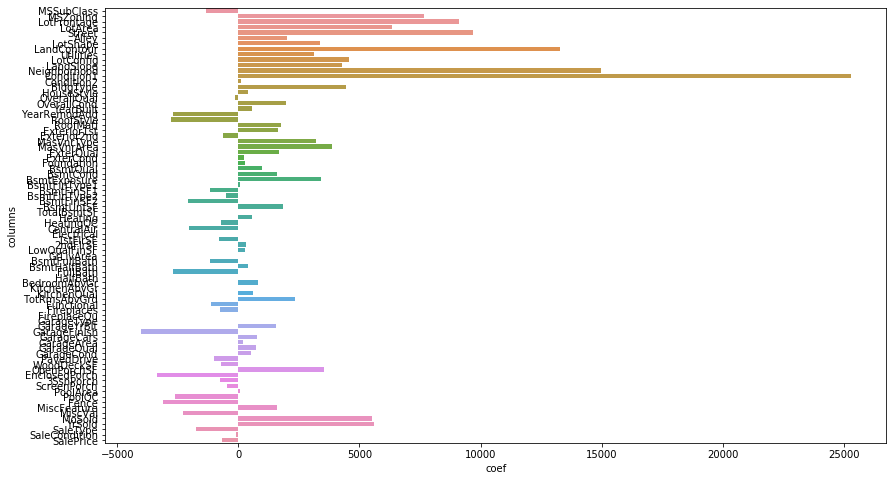

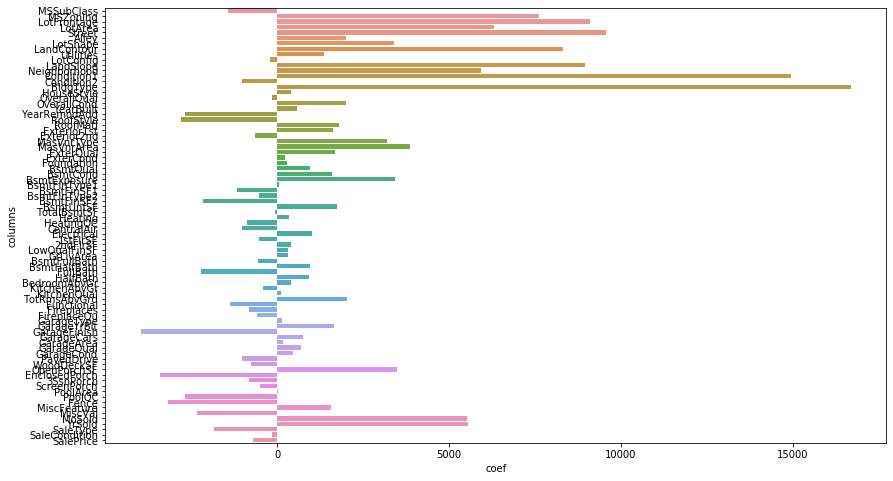

In [17]:
#lasso = linear_model.Lasso()
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(X, Y)

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lasso.coef_, df.columns)), columns=["coef", "columns"]))



ridge = Ridge()
ridge.fit(X, Y)

for coef, col in sorted(zip(ridge.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.coef_, df.columns)), columns=["coef", "columns"]))

# обучение на разных альфа
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(X, Y)
    coefs_lasso[i, :] = lasso.coef_
    
    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(X, Y)
    coefs_ridge[i, :] = ridge.coef_
    
    i += 1

Text(0.5, 1.0, 'Ridge')

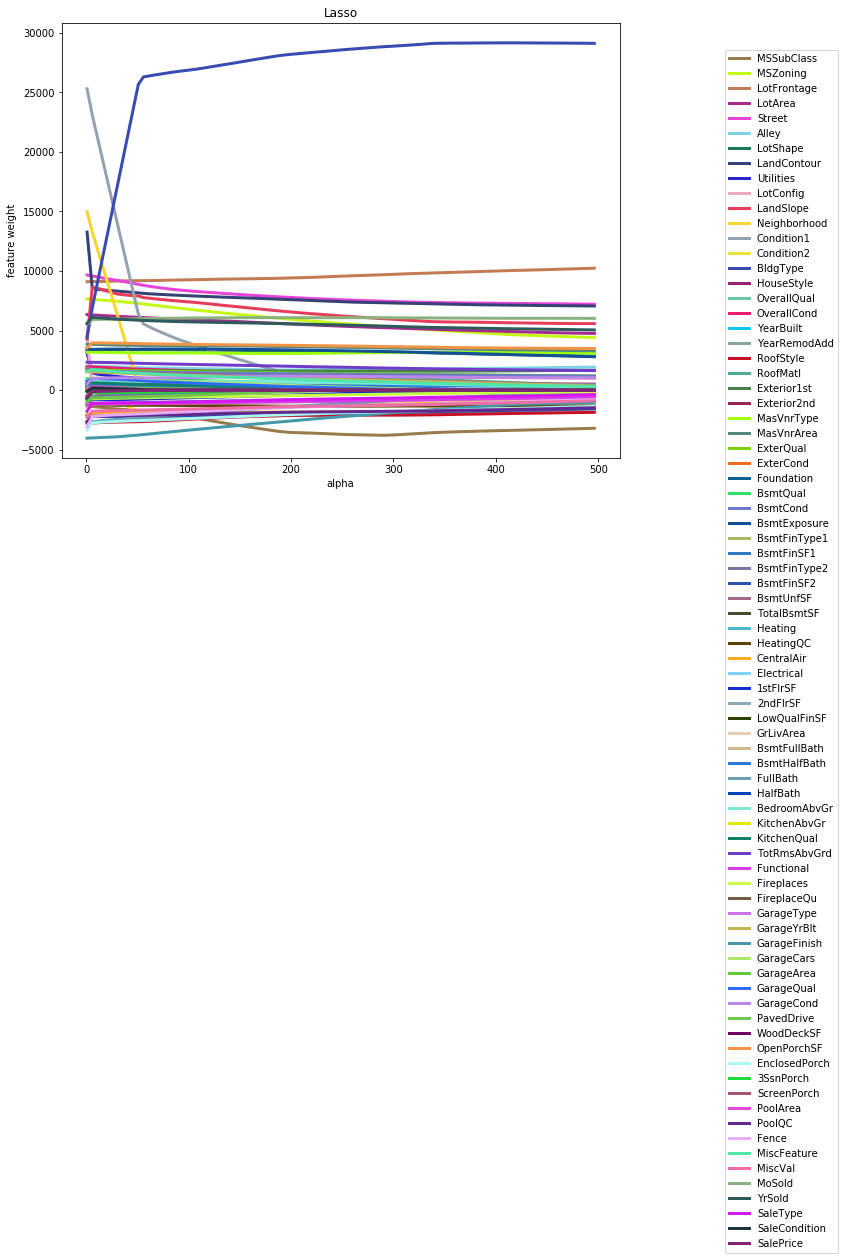

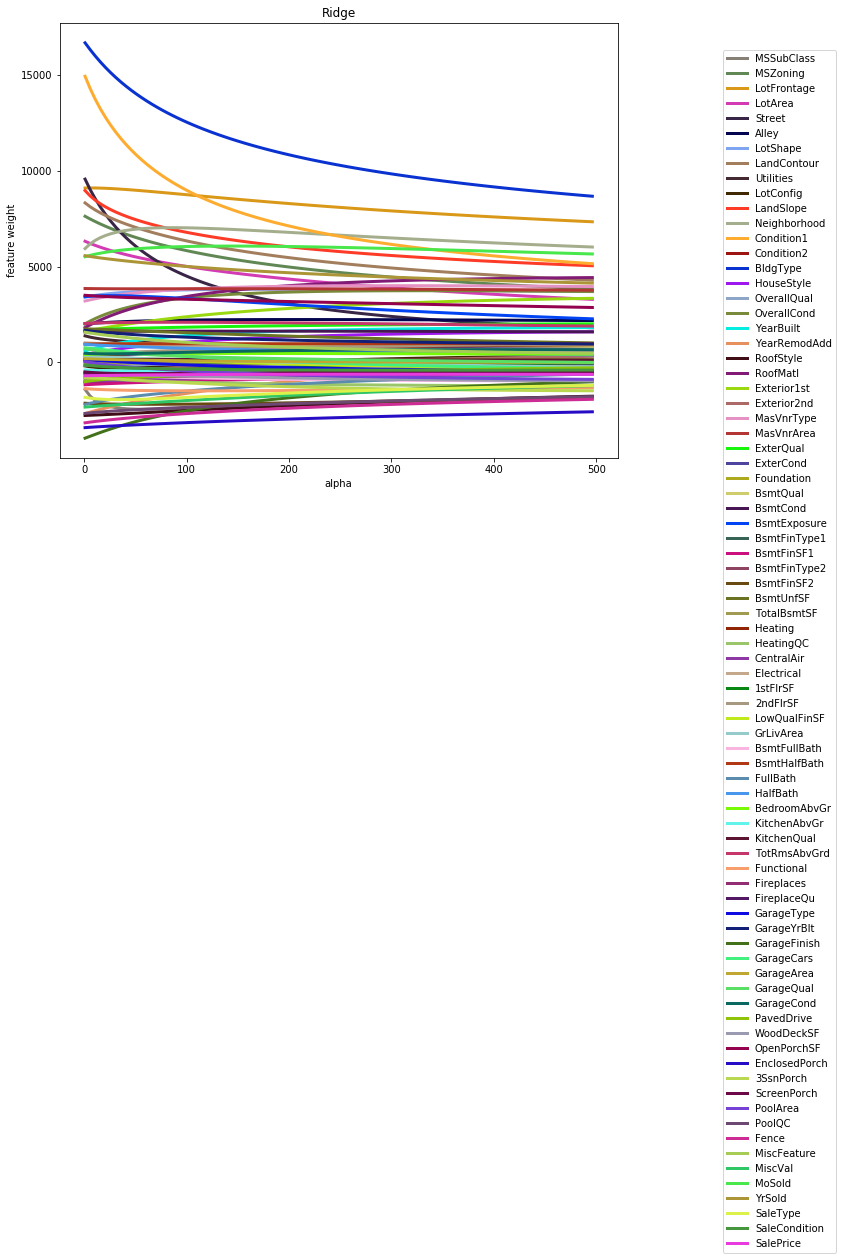

In [18]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

#coef_graph;
#X = alpha; Y = coef; hue = columns

In [19]:
#hist or countplot;
# x = alpha; Y = number of coef <0.0001cla

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, на которой будет показана значение коэффициентов для каждого признака. График должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32629381032.676758, tolerance: 696659484.3571944
  tol, rng, random, positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36455386228.909424, tolerance: 721310725.7925861
  tol, rng, random, positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2168711546.8598633, tolerance: 759451427.7722781
  tol, rng, random, positive)
/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/

alpha = 50.0
[-706.55228285 -702.1394844  -697.75453451 -693.47450531 -689.34696531
 -685.39814212 -681.64040282 -678.07739662 -674.70738111 -671.52534642
 -668.5243729  -665.69650185 -663.03329496 -660.52619257 -658.16674084
 -655.94673265 -653.85829161 -651.89391814 -650.0465107  -648.30937053
 -646.67619574 -645.14106875 -643.69843959 -642.34310701 -641.07019858
 -639.8751505  -638.75368779 -637.70180517 -636.71574872 -635.79199863
 -634.92725297 -634.11841244 -633.36256625 -632.65697896 -631.99907829
 -631.3864438  -630.81679642 -630.28798879 -629.79799633 -629.34490895
 -628.9269234  -628.54233622 -628.18953721 -627.86700332 -627.57329314
 -627.30704164 -627.0669554  -626.85180813 -626.66043653 -626.4917365
 -626.3446595  -626.21820928 -626.11143875 -626.02344718 -625.95337744
 -625.90041353 -625.86377829 -625.84273116 -625.8365662  -625.84461015
 -625.8662207  -625.90078475 -625.94771695 -626.00645814 -626.07647405
 -626.15725398 -626.24830957 -626.34917374 -626.45939953 -626.578

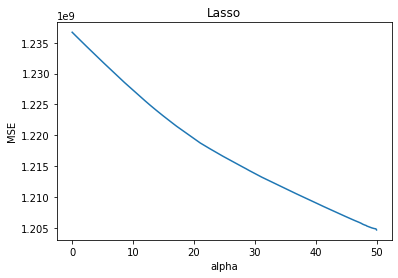

In [20]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, random_state=42,cv = 5)
lasso_cv.fit(X, Y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))


сoef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df2.columns)))
print(coef)
#coef.columns = ['weight', 'feature']
#coef.sort_values(['weight'], ascending=False)

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

Теперь, самую мощную на ваш взгляд модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`. Под моделью мы понимаем не только сами регрессоры, но и переданные при создании параметры.

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены вдоль прямой `y = x` с некоторым разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы составили датасет с очень малым количеством полезных признаков в соответствии с heatmap? Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот датасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.